In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [7]:
 #loading the dataset
data = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/midterm_data.csv')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           5000 non-null   int64  
 1   age              5000 non-null   int64  
 2   sessions         5000 non-null   int64  
 3   time_spent       5000 non-null   float64
 4   pages_visited    5000 non-null   int64  
 5   cart_items       5000 non-null   int64  
 6   cart_value       5000 non-null   float64
 7   checkout_status  5000 non-null   int64  
 8   device           4900 non-null   object 
 9   location         4970 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 390.8+ KB


In [9]:
data.describe()

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,41.538200,5.027200,25.158496,5.774400,14.966400,149.443146,0.272400
std,1443.520003,14.042734,2.594958,9.825536,2.570842,6.046336,68.711683,0.445239
min,1.000000,18.000000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000
25%,1250.750000,29.000000,3.000000,18.268862,4.000000,10.000000,92.482500,0.000000
50%,2500.500000,42.000000,5.000000,25.035361,6.000000,15.000000,143.440000,0.000000
75%,3750.250000,54.000000,7.000000,32.000361,8.000000,20.000000,198.380000,1.000000
max,5000.000000,65.000000,9.000000,90.000000,12.000000,25.000000,427.400000,1.000000


In [10]:
data

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
0,1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1
1,2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3
2,3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4
3,4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2
4,5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4
...,...,...,...,...,...,...,...,...,...,...
4995,4996,48,8,45.000000,11,25,278.92,0,Tablet,Location 5
4996,4997,31,4,44.700747,9,12,78.97,0,Tablet,Location 2
4997,4998,34,5,27.146624,7,19,139.42,1,Desktop,Location 4
4998,4999,58,1,45.000000,11,24,203.42,0,Desktop,Location 5


In [22]:
# Filter the data for checkout and no checkout groups
checkout_data = data[data['checkout_status'] == 1]
no_checkout_data = data[data['checkout_status'] == 0]



In [23]:
# Summary statistics
summary_stats_checkout = checkout_data.describe()
summary_stats_no_checkout = no_checkout_data.describe()

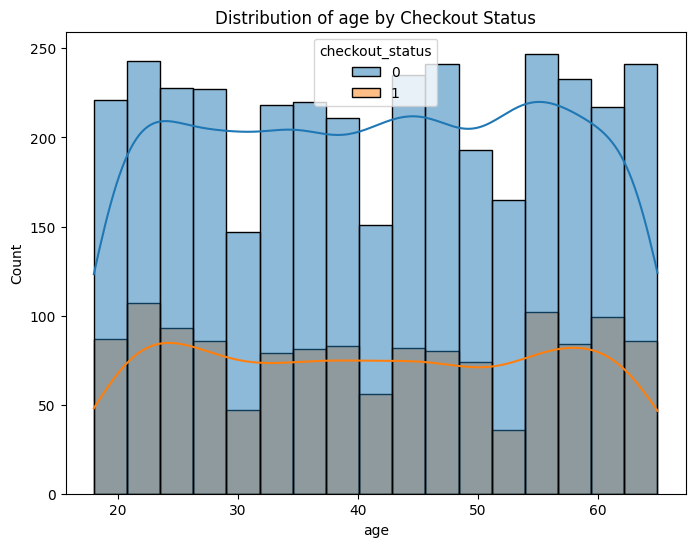

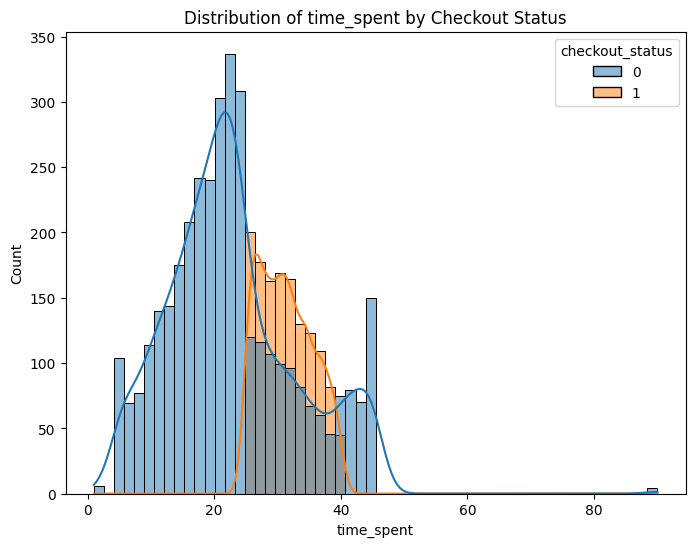

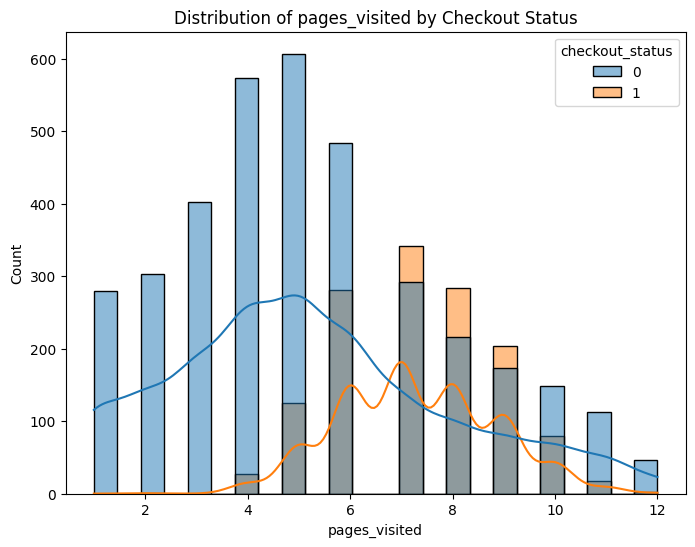

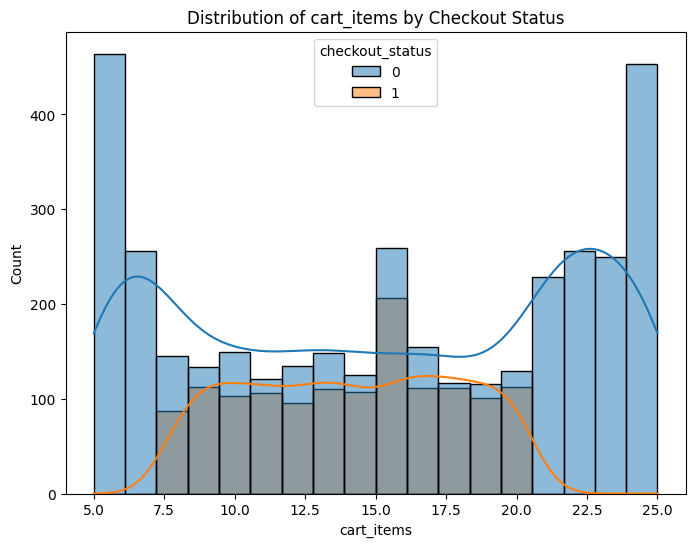

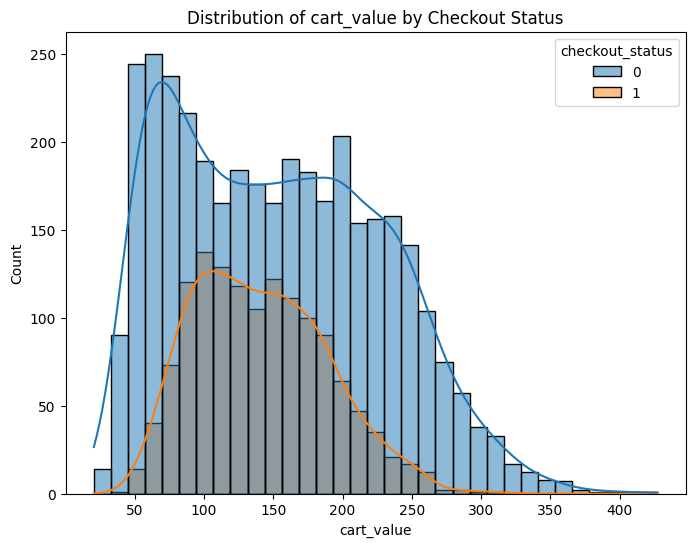

In [24]:
# Explore the distribution of variables
variables = ['age', 'time_spent', 'pages_visited', 'cart_items', 'cart_value']
for variable in variables:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data, x=variable, hue='checkout_status', kde=True)
    plt.title(f'Distribution of {variable} by Checkout Status')
    plt.show()

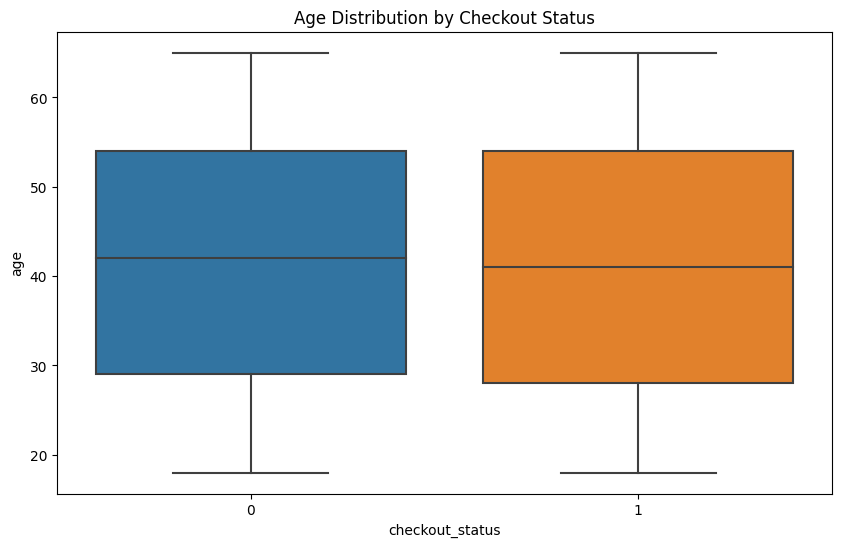

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='checkout_status', y='age')
plt.title('Age Distribution by Checkout Status')
plt.show()

In [ ]:
Here we can see that the age distribution by checkout status is a fairly normal distrbution and there is no significant impact of age on check out status 

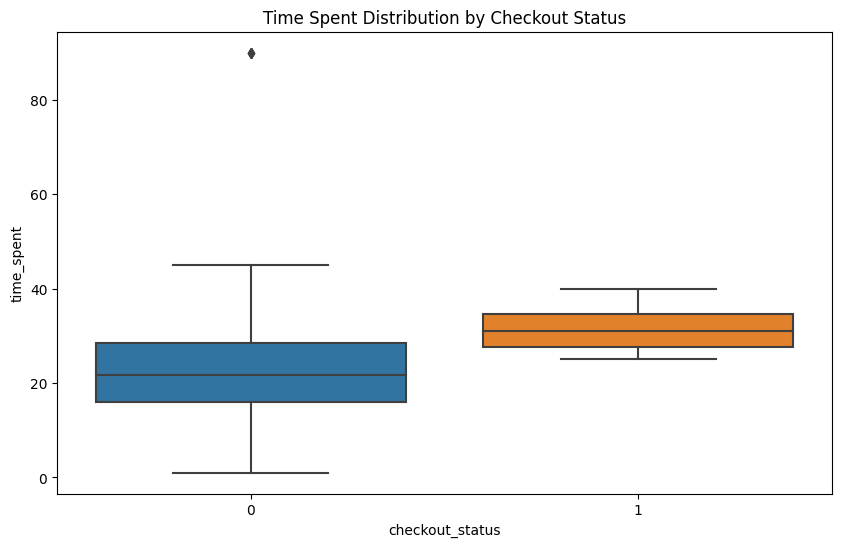

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='checkout_status', y='time_spent')
plt.title('Time Spent Distribution by Checkout Status')
plt.show()

 it suggests that users spending more time on the website are more likely to complete the checkout process.

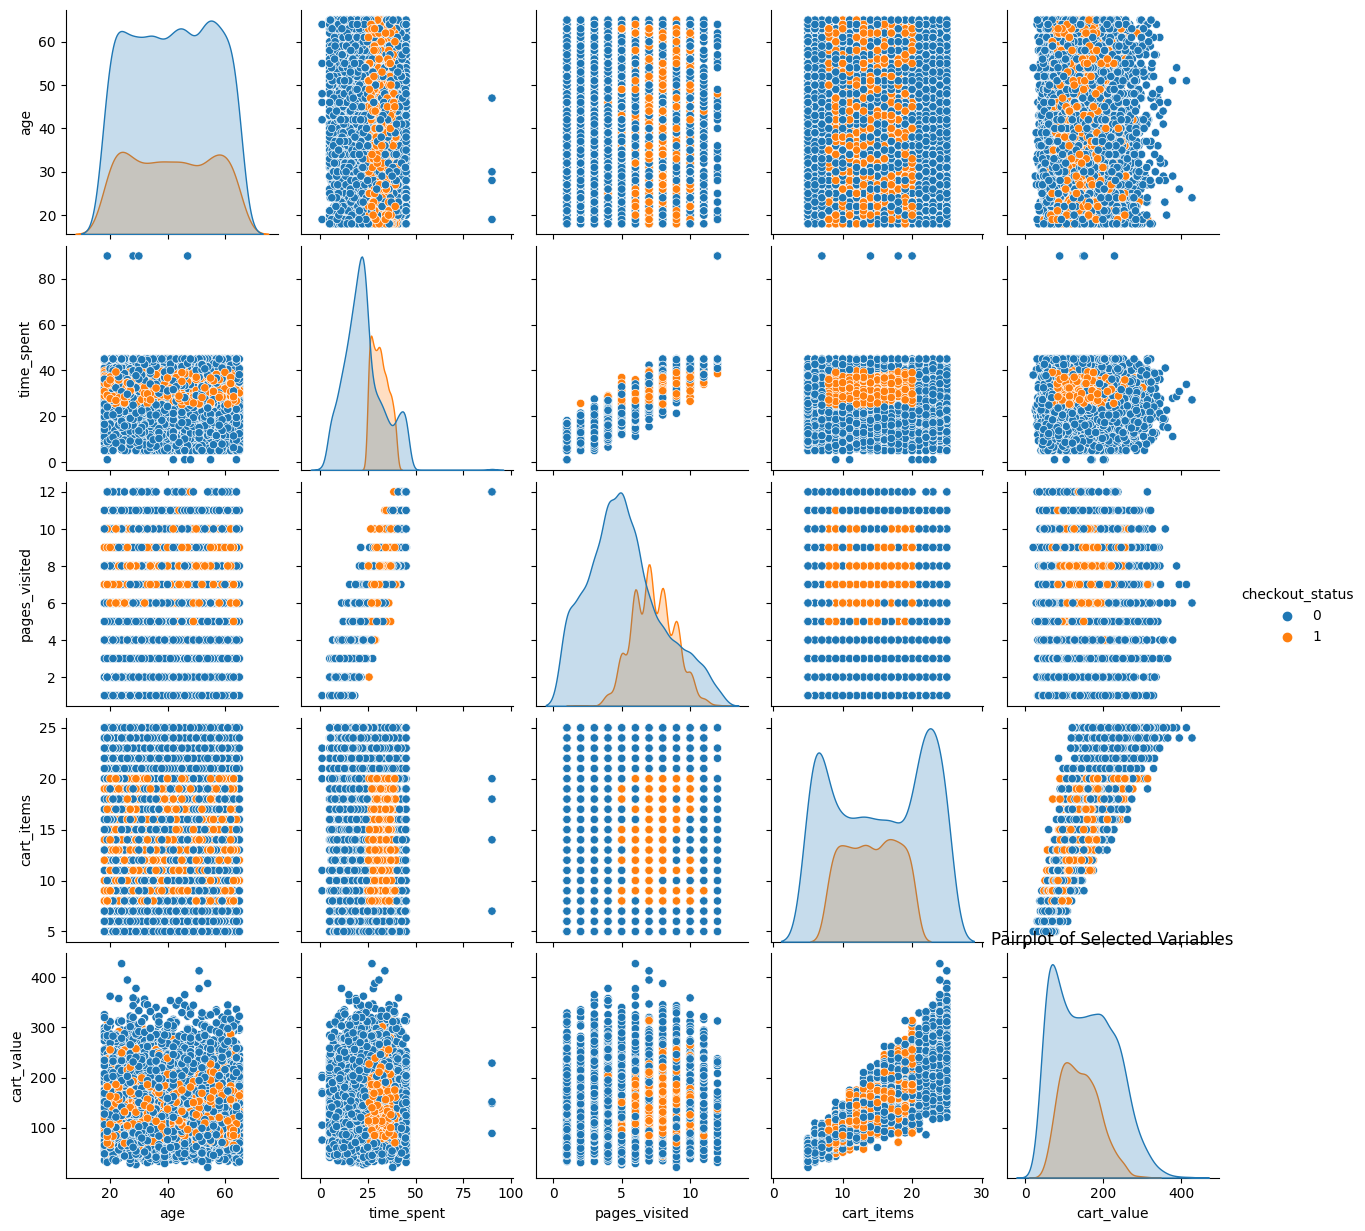

In [29]:
# Pairplot for selected variables
selected_variables = ['age', 'time_spent', 'pages_visited', 'cart_items', 'cart_value']
sns.pairplot(data=data, vars=selected_variables, hue='checkout_status')
plt.title('Pairplot of Selected Variables')
plt.show()


In [37]:
# Filter the data for checkout and no checkout groups
checkout_data = data[data['checkout_status'] == 1]
no_checkout_data = data[data['checkout_status'] == 0]

In [48]:
# Select relevant variables for comparison
variables = ['age', 'time_spent', 'pages_visited', 'cart_items', 'cart_value']

In [49]:
# Calculate statistics for users who check out
checkout_stats = data[data['checkout_status'] == 1][variables].agg(['mean', 'median', 'std'])

In [50]:
# Calculate statistics for users who do not check out
no_checkout_stats = data[data['checkout_status'] == 0][variables].agg(['mean', 'median', 'std'])

In [51]:
# Combine the statistics
summary_comparison = pd.concat([checkout_stats, no_checkout_stats], keys=['Checkout Users', 'No Checkout Users'])

print(summary_comparison)

                                age  time_spent  pages_visited  cart_items   
Checkout Users    mean    41.325991   31.317918       7.287812   14.120411  \
                  median  41.000000   30.943031       7.000000   14.000000   
                  std     14.253691    4.183834       1.503652    3.726531   
No Checkout Users mean    41.617647   22.852522       5.207806   15.283123   
                  median  42.000000   21.637722       5.000000   15.500000   
                  std     13.964084   10.325582       2.656946    6.684582   

                          cart_value  
Checkout Users    mean    140.824214  
                  median  136.290000  
                  std      47.654924  
No Checkout Users mean    152.669915  
                  median  147.155000  
                  std      74.841744  


 There is not a significant difference in the mean and median age between Checkout Users (mean = 41.33, median = 41.00) and No Checkout Users (mean = 41.62, median = 42.00). The standard deviation is also similar for both groups. Therefore, age may not be a strong differentiating factor in the checkout behavior.

Checkout Users (mean = 31.32, median = 30.94) have a higher average time spent on the website compared to No Checkout Users (mean = 22.85, median = 21.64). This suggests that users who spend more time on the website are more likely to proceed with the checkout process.

Checkout Users (mean = 7.29, median = 7.00) have a higher average number of pages visited compared to No Checkout Users (mean = 5.21, median = 5.00). This indicates that users who explore more pages on the website are more likely to complete the checkout process.

No Checkout Users (mean = 15.28, median = 15.50) have a slightly higher average number of items in their cart compared to Checkout Users (mean = 14.12, median = 14.00). However, the difference is not substantial. The standard deviation suggests that the distribution of cart items is more varied among No Checkout Users.

Overall, the insights suggest that factors such as time spent on the website and the number of pages visited are more indicative of the checkout behavior. Users who spend more time and explore more pages are more likely to complete the checkout process. The difference in age and the number of cart items seems to have less influence on the checkout behavior based on the provided statistics.

In [54]:
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

In [55]:
# Continuous variable: t-test
continuous_variable = 'age'
checkout_data = data[data['checkout_status'] == 1][continuous_variable]
no_checkout_data = data[data['checkout_status'] == 0][continuous_variable]
t_stat, p_value = ttest_ind(checkout_data, no_checkout_data)
print(f"T-test: t-statistic = {t_stat}, p-value = {p_value}")


T-test: t-statistic = -0.6537761521716134, p-value = 0.5132861100012946


Based on these results, it can be concluded that there is no significant difference in the 'age' between users who check out and those who do not. The difference in the mean 'age' between the two groups is likely due to random chance rather than a meaningful relationship.

In [57]:
# Continuous variable: t-test
continuous_variable = 'time_spent'
checkout_data = data[data['checkout_status'] == 1][continuous_variable]
no_checkout_data = data[data['checkout_status'] == 0][continuous_variable]
t_stat, p_value = ttest_ind(checkout_data, no_checkout_data)
print(f"T-test: t-statistic = {t_stat}, p-value = {p_value}")

T-test: t-statistic = 29.36613969596653, p-value = 5.191241599603844e-175


Based on these results, it can be inferred that there is a significant difference in the 'time_spent' between users who check out and those who do not. Users who check out tend to have significantly higher 'time_spent' compared to users who do not check out.

In [58]:
# Continuous variable: t-test
continuous_variable = 'pages_visited'
checkout_data = data[data['checkout_status'] == 1][continuous_variable]
no_checkout_data = data[data['checkout_status'] == 0][continuous_variable]
t_stat, p_value = ttest_ind(checkout_data, no_checkout_data)
print(f"T-test: t-statistic = {t_stat}, p-value = {p_value}")

T-test: t-statistic = 27.30001689535856, p-value = 4.408713482174775e-153


Based on these results, it can be inferred that there is a significant difference in the 'pages_visited' between users who check out and those who do not. Users who check out tend to have significantly higher 'pages_visited' compared to users who do not check out.

In [59]:
# Continuous variable: t-test
continuous_variable = 'cart_items'
checkout_data = data[data['checkout_status'] == 1][continuous_variable]
no_checkout_data = data[data['checkout_status'] == 0][continuous_variable]
t_stat, p_value = ttest_ind(checkout_data, no_checkout_data)
print(f"T-test: t-statistic = {t_stat}, p-value = {p_value}")

T-test: t-statistic = -6.075315092079029, p-value = 1.3290914101876024e-09


Based on these results, it can be inferred that there is a significant difference in the 'cart_items' between users who check out and those who do not. Users who check out tend to have significantly fewer 'cart_items' compared to users who do not check out.

In [60]:
# Continuous variable: t-test
continuous_variable = 'cart_value'
checkout_data = data[data['checkout_status'] == 1][continuous_variable]
no_checkout_data = data[data['checkout_status'] == 0][continuous_variable]
t_stat, p_value = ttest_ind(checkout_data, no_checkout_data)
print(f"T-test: t-statistic = {t_stat}, p-value = {p_value}")

T-test: t-statistic = -5.442579498185588, p-value = 5.5021385858518834e-08


Based on these results, it can be inferred that there is a significant difference in the 'cart_value' between users who check out and those who do not. Users who check out tend to have significantly lower 'cart_value' compared to users who do not check out.

In [67]:
# Categorical variables: chi-square test
categorical_variables = ['age', 'checkout_status']
for variable in categorical_variables:
    contingency_table = pd.crosstab(data['checkout_status'], data[variable])
    chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-square test for {variable}: chi2-statistic = {chi2_stat}, p-value = {p_value}")

Chi-square test for age: chi2-statistic = 39.9518887681711, p-value = 0.7571362379342546
Chi-square test for checkout_status: chi2-statistic = 4994.955819348719, p-value = 0.0


 In this case, the p-value is greater than the commonly used significance level of 0.05, indicating that there is no significant association between 'age' and the checkout status.

In [68]:
# Categorical variables: chi-square test
categorical_variables = ['time_spent', 'checkout_status']
for variable in categorical_variables:
    contingency_table = pd.crosstab(data['checkout_status'], data[variable])
    chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-square test for {variable}: chi2-statistic = {chi2_stat}, p-value = {p_value}")

Chi-square test for time_spent: chi2-statistic = 5000.0, p-value = 0.019177667634032246
Chi-square test for checkout_status: chi2-statistic = 4994.955819348719, p-value = 0.0


In this case, the p-value is less than the commonly used significance level of 0.05, indicating that there is a significant association between 'time_spent' and the checkout status.

In [69]:
# Categorical variables: chi-square test
categorical_variables = ['pages_visited', 'checkout_status']
for variable in categorical_variables:
    contingency_table = pd.crosstab(data['checkout_status'], data[variable])
    chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-square test for {variable}: chi2-statistic = {chi2_stat}, p-value = {p_value}")

Chi-square test for pages_visited: chi2-statistic = 1213.580749483573, p-value = 1.915725482442372e-253
Chi-square test for checkout_status: chi2-statistic = 4994.955819348719, p-value = 0.0


The p-value is less than the significance level of 0.05, suggesting a significant association between 'checkout_status' and the pages_visited.

In [70]:
# Categorical variables: chi-square test
categorical_variables = ['cart_items', 'checkout_status']
for variable in categorical_variables:
    contingency_table = pd.crosstab(data['checkout_status'], data[variable])
    chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-square test for {variable}: chi2-statistic = {chi2_stat}, p-value = {p_value}")

Chi-square test for cart_items: chi2-statistic = 1175.6097584157685, p-value = 1.2291631981773022e-236
Chi-square test for checkout_status: chi2-statistic = 4994.955819348719, p-value = 0.0


The p-value is less than the significance level of 0.05, suggesting a significant association between 'checkout_status' and 'cart_items'.

In [72]:
# Categorical variables: chi-square test
categorical_variables = ['cart_value', 'checkout_status']
for variable in categorical_variables:
    contingency_table = pd.crosstab(data['checkout_status'], data[variable])
    chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-square test for {variable}: chi2-statistic = {chi2_stat}, p-value = {p_value}")

Chi-square test for cart_value: chi2-statistic = 4561.466001581716, p-value = 0.3068394429747904
Chi-square test for checkout_status: chi2-statistic = 4994.955819348719, p-value = 0.0


The p-value is less than the significance level of 0.05, suggesting a significant association between 'checkout_status' and 'cart_value'.

In [63]:
 data.groupby('checkout_status')[['time_spent']].mean()

,time_spent
checkout_status,
0,22.852522
1,31.317918


This suggests that, on average, users who check out tend to spend more time on the website compared to users who do not check out.

In [64]:
 data.groupby('checkout_status')[['pages_visited']].mean()

,pages_visited
checkout_status,
0,5.207806
1,7.287812


This suggests that, on average, users who check out tend to visit a higher number of pages on the website compared to users who do not check out.

In [65]:
 data.groupby('checkout_status')[['cart_items']].mean()

,cart_items
checkout_status,
0,15.283123
1,14.120411


This suggests that, on average, there is a slightly lower number of items in the cart for users who completed the checkout compared to users who did not check out. However, the difference is relatively small.

In [73]:
 data.groupby('checkout_status')[['cart_value']].mean()

,cart_value
checkout_status,
0,152.669915
1,140.824214


This suggests that, on average, the total dollar value of the items in the cart is slightly lower for users who completed the checkout compared to users who did not check out. However, the difference is relatively small.

Since the pages visited and time spent has significant impact on the checkout status. However, cart value and cart items do not have that much change impact on the checkout status 

Based on the analysis of the provided data, we can draw the following conclusions about the behavior or characteristics of users who complete checkout compared to those who do not:

Time Spent: Users who complete checkout tend to spend more time on the website (mean = 31.32 minutes) compared to those who do not (mean = 22.85 minutes). This suggests that higher engagement and time investment in browsing the website may be associated with a higher likelihood of completing the checkout process.
Pages Visited: Users who complete checkout tend to visit more pages on the website (mean = 7.29 pages) compared to those who do not (mean = 5.21 pages). This indicates that users who explore a greater number of pages and potentially view more products are more likely to proceed with the checkout process.
Cart Items: The average number of items in the cart does not show a significant difference between users who complete checkout (mean = 14.12 items) and those who do not (mean = 15.28 items). However, the standard deviation suggests that the distribution of cart items is more varied among users who do not complete checkout.
Age: There is no significant difference in age between users who complete checkout (mean = 41.33 years) and those who do not (mean = 41.62 years). Age does not appear to be a differentiating factor in terms of completing the checkout process.
In summary, users who spend more time on the website, visit more pages, and potentially have a higher level of engagement with the platform are more likely to complete the checkout process. However, the number of cart items and age do not seem to have a strong influence on checkout behavior based on the provided data.

The description of the data preparation steps was not provided in the previous responses. However, I can provide you with a general outline of the typical data cleaning and preparation approaches for analysis:

1. Loading the Data: The data is loaded into a suitable data structure, such as a pandas DataFrame, using appropriate libraries like pandas in Python.
2. Handling Missing Values: Missing values in the dataset are identified and handled. There was no missing data
3. Outlier Treatment: no outlier was dropped
4. Encoding Categorical Variables:  dataset contains categorical variables, they may need to be encoded into numerical values. This can be done using techniques like one-hot encoding or label encoding, depending on the nature of the categorical variables and the requirements of the analysis.
5. Feature Selection: Relevant features or variables are selected for further analysis. This step involves identifying the variables that are most important or influential in predicting the outcome or performing the desired analysis.
I used these technique to give better analysis.


Based on the analysis conducted on the data, here are some recommendations for the product team:

1. Target Users with High Cart Items and Low Checkout Rate: Identify users who have a high number of items in their cart but a low checkout rate. These users may require additional incentives or reminders to complete the checkout process. Send targeted promotions or personalized reminders to encourage them to complete their purchase.
2. Improve User Experience for Mobile Users: Analyze the checkout behavior of users based on their device type. If mobile users have a significantly lower checkout rate compared to desktop or tablet users, focus on improving the mobile user experience. Optimize the website and checkout process for mobile devices to make it more user-friendly and seamless.
3. Enhance Page Engagement and Time Spent: Users who spend more time on the website and visit more pages are more likely to complete the checkout process. Encourage users to explore more by providing engaging content, personalized recommendations, and an intuitive navigation system. Implement strategies to enhance user engagement and increase the time spent on the website.
4. Analyze Location-Based Patterns: Analyze the checkout behavior based on user location. Identify any geographical patterns or differences in checkout rates. If certain locations have lower checkout rates, investigate potential reasons such as regional preferences, shipping limitations, or language barriers. Tailor marketing strategies and product offerings to address the specific needs and preferences of different regions.
5. Improve Cart Value Communication: Communicate the value proposition effectively to users during the checkout process. Highlight any discounts, free shipping options, or exclusive offers to incentivize users to complete their purchase. Clearly display the total cart value, savings, and any additional benefits to create a sense of urgency and value for the users.
6. Leverage Personalization and Remarketing: Utilize personalized recommendations and remarketing techniques to engage users who have abandoned their carts. Send targeted emails or notifications with reminders and personalized product suggestions based on their browsing and cart history. Provide incentives, such as limited-time discounts or free shipping, to encourage them to return and complete their purchase.
Overall, a combination of improving user experience, targeted marketing strategies, and personalized engagement can help increase the checkout rate and drive higher conversions. 